In [29]:
%matplotlib inline

from __future__ import division
import os
import sys
from scipy import integrate, optimize

from scipy.interpolate import interp2d, interp1d

import numpy as np
from numpy import pi,sin,cos,tan,e,arctan,arcsin,arccos,sqrt
from numpy.random import randn
import matplotlib
import matplotlib.pyplot as P
from time import clock



from mpl_toolkits.mplot3d import axes3d
matplotlib.rcParams['figure.figsize'] = (9, 6)
P.rcParams['text.usetex'] = True  # not really needed
P.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
P.rcParams["font.size"] = 24
P.rc('xtick', labelsize=20) 
P.rc('ytick', labelsize=20)
# P.rc('xtick', labelsize=20) 
# P.rc('ytick', labelsize=20)
np.set_printoptions(threshold=np.nan)


# sys.path.append("/Users/amadeus/Documents/10.semester/ma")
# from magmod import P_cdm_BBKS, D_z, rCom, H_0, c, H_z, E_z, Omega_m, W_tophat, T_obs, nutoz21, h
# from magmod import P_cdm_BBKS, D_z, rCom, H_0, c, H_z, E_z, Omega_m, T_obs, nutoz21, h
from lf_photometric import *

In [2]:
mtabfine = np.linspace(24,27,300)
ztabfine = np.linspace(0.01,3.5,200)
mfinemesh, zfinemesh = np.meshgrid(mtabfine, ztabfine)


lclf_fine_mesh = np.zeros(mfinemesh.shape)

for i in range(lclf_fine_mesh.shape[0]):
    for j in range(lclf_fine_mesh.shape[1]):
        absmagred = app2abs(mfinemesh[i,j], zfinemesh[i,j], "red")
        absmagblue = app2abs(mfinemesh[i,j], zfinemesh[i,j], "blue")
        tmp = cumulative_lumfun(absmagred, absmagblue, zfinemesh[i,j], 'all')
        logtmp = np.log10(tmp)
#         logtmp = np.log10(np.abs(tmp))
#         count = 0
#         if np.isnan(logtmp) and count ==0:
#             print tmp
#             count +=1
        lclf_fine_mesh[i,j] = logtmp
        
dlclf_dm = np.gradient(lclf_fine_mesh, mtabfine, axis = 1)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:1011: RuntimeWarning: invalid value encountered in multiply
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:1011: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:1020: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0


In [3]:
print dlclf_dm.shape

(200, 300)


In [4]:
def biastest(z, mstar, TEST = False):
    """magnification bias test via num deriv of cumlumfun"""
    zi = np.argmin( np.abs( ztabfine - z))
    mi = np.argmin( np.abs( mtabfine - mstar))
    res = dlclf_dm[zi, mi]
    if np.isnan(res) and TEST:
        print "nan at zi {} and mi {}".format(zi, mi)
    return res

In [5]:
print biastest(3.4,25, TEST = True)

nan at zi 193 and mi 100
nan


In [6]:
print np.isnan(lclf_fine_mesh).any()

# print np.isnan(dlclf_dm)

False


In [7]:
magtab = np.linspace(24,27,20)
z = np.linspace(0.01,3.5,50)

magmesh, zmesh = np.meshgrid(magtab, z)



bmesh = np.zeros(magmesh.shape)
btestmesh = np.zeros(magmesh.shape)
# nzmesh = np.zeros(magmesh.shape)

lfmesh = np.zeros(magmesh.shape)
lf_red_mesh = np.zeros(magmesh.shape)
lf_blue_mesh = np.zeros(magmesh.shape)
lf_all_mesh = np.zeros(magmesh.shape)

clfmesh = np.zeros(magmesh.shape)
clf_all_mesh = np.zeros(magmesh.shape)
clf_red_mesh = np.zeros(magmesh.shape)
clf_blue_mesh = np.zeros(magmesh.shape)

for i in range(bmesh.shape[0]):
    for j in range(bmesh.shape[1]):
        absmagred = app2abs(magmesh[i,j],zmesh[i,j],"red")
        absmagblue = app2abs(magmesh[i,j],zmesh[i,j],"blue")

        bmesh[i,j] = s_magbias(zmesh[i,j], magmesh[i,j], 'all')
        btestmesh[i,j] = biastest(zmesh[i,j], magmesh[i,j])
#         nzmesh[i,j] = nz_distribution(zmesh[i,j], magmesh[i,j], 'all')
        lfmesh[i,j] = lumfun_mag(absmagblue, zmesh[i,j], 'all')
        lf_red_mesh[i,j] = lumfun_mag(absmagblue, zmesh[i,j], 'red')
        lf_blue_mesh[i,j] = lumfun_mag(absmagblue, zmesh[i,j], 'blue')
        
        lf_all_mesh[i,j] = lf_red_mesh[i,j] + lf_blue_mesh[i,j]
        
        clfmesh[i,j] = cumulative_lumfun(absmagred, absmagblue, zmesh[i,j], 'all')
        clf_all_mesh[i,j] = cumulative_lumfun_all(absmagred, zmesh[i,j], 'all')
        clf_red_mesh[i,j] = cumulative_lumfun(absmagred,absmagblue, zmesh[i,j], 'red')
        clf_blue_mesh[i,j] = cumulative_lumfun(absmagred,absmagblue, zmesh[i,j], 'blue')

# btab = [s_magbias(zmesh, mm, 'all') for mm in magmesh]
# btab = np.array(btab)

lf_photometric.py:272: RuntimeWarning: divide by zero encountered in divide
  return 0.4*lumphi/lumPhi


In [8]:
print np.isnan(bmesh).any()
i_inf = np.where(np.isinf(bmesh))
# print bmesh[i_inf]
m_inf = magmesh[i_inf]
z_inf =zmesh[i_inf]
b_inf = bmesh[i_inf]
for i in range(len(m_inf)):
    print "m {}, z {}, b {}".format(m_inf[i], z_inf[i], b_inf[i])

False
m 24.0, z 3.00142857143, b inf
m 24.0, z 3.07265306122, b inf
m 24.1578947368, z 3.07265306122, b inf
m 24.3157894737, z 3.07265306122, b inf
m 24.0, z 3.14387755102, b inf
m 24.1578947368, z 3.14387755102, b inf
m 24.3157894737, z 3.14387755102, b inf
m 24.4736842105, z 3.14387755102, b inf
m 24.0, z 3.21510204082, b inf
m 24.1578947368, z 3.21510204082, b inf
m 24.3157894737, z 3.21510204082, b inf
m 24.4736842105, z 3.21510204082, b inf
m 24.6315789474, z 3.21510204082, b inf
m 24.0, z 3.28632653061, b inf
m 24.1578947368, z 3.28632653061, b inf
m 24.3157894737, z 3.28632653061, b inf
m 24.4736842105, z 3.28632653061, b inf
m 24.6315789474, z 3.28632653061, b inf
m 24.7894736842, z 3.28632653061, b inf
m 24.0, z 3.35755102041, b inf
m 24.1578947368, z 3.35755102041, b inf
m 24.3157894737, z 3.35755102041, b inf
m 24.4736842105, z 3.35755102041, b inf
m 24.6315789474, z 3.35755102041, b inf
m 24.7894736842, z 3.35755102041, b inf
m 24.9473684211, z 3.35755102041, b inf
m 25.105

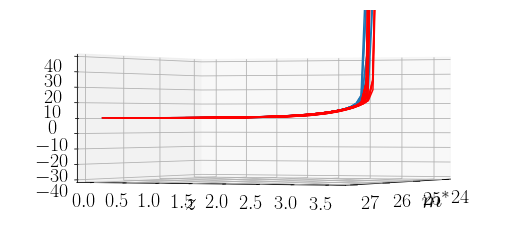

In [43]:
# fig = P.figure(figsize = (10,13)); ax = fig.add_subplot(211, projection = '3d');# ax2 = fig.add_subplot(212, projection = '3d')
fig = P.figure(figsize = (9,9)); ax = fig.add_subplot(211, projection = '3d');# ax2 = fig.add_subplot(212, projection = '3d')


ax.plot_wireframe(magmesh, zmesh, bmesh, rstride=3, cstride=3, label = "$b_\mu$")
ax.plot_wireframe(magmesh, zmesh, btestmesh, rstride=3, cstride=1, color = 'red')


# ax2.plot_wireframe(magmesh, zmesh, nzmesh, rstride=1, cstride=2)

# ax2.plot_wireframe(magmesh, zmesh, clfmesh, rstride=3, cstride=3)
# # ax2.plot_wireframe(magmesh, zmesh, lfmesh, rstride=3, cstride=3, color = 'red')
# ax2.plot_wireframe(magmesh, zmesh, clf_all_mesh, rstride=3, cstride=3, color = 'green')
# # ax2.plot_wireframe(magmesh, zmesh, 0.4*lfmesh/clfmesh, rstride=3, cstride=3)



# ax.plot_surface(magmesh, zmesh, bmesh)
# ax.plot_surface(magmesh, zmesh, nzmesh)


# ax.set_zlim((-10,10))
ax.set_zlim((-40,40))
ax.set_xlabel("$m^*$")
ax.set_ylabel("$z$")
ax.set_xticks(np.array([24,25,26,27]))
# for tick in ax.get_zticklabels():
#     tick.set_rotation(45)
# ax.view_init(25, 24)
# ax.view_init(50, 240)
ax.view_init(0, 24)
# ax.legend()


# ax2.set_zlim((0.,.1))
# ax2.view_init(20, 25)
# ax2.set_xlabel("$m^*$")
# ax2.set_ylabel("$z$")

outroot = "/Users/amadeus/Documents/PhD/work/MagBias/plots/"
plotname = "magbias_discont.png"
bbox = fig.bbox_inches.from_bounds(1, 1, 8, 6)

P.savefig(outroot + plotname, bbox_inches = 'tight')



Text(0.5,1,'z=1.1')

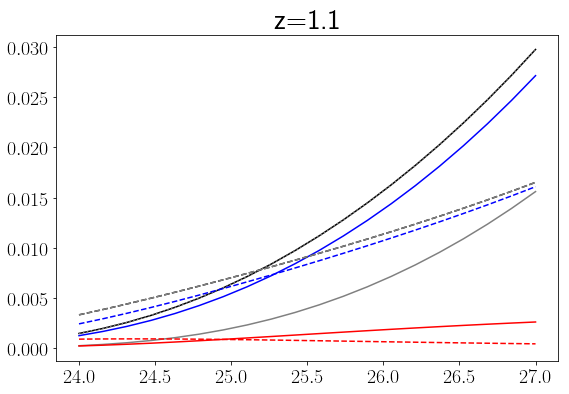

In [10]:
fig = P.figure(); ax = fig.add_subplot(111);

zi = 15
ax.plot(magtab, clfmesh[zi], c= 'black')
ax.plot(magtab, clf_all_mesh[zi], c ='grey')
ax.plot(magtab, clf_red_mesh[zi], c ='red')
ax.plot(magtab, clf_blue_mesh[zi], c ='blue')
ax.plot(magtab, clf_blue_mesh[zi]+ clf_red_mesh[zi], c ='grey', ls = ":")


ax.plot(magtab, lfmesh[zi], c='black', ls = "--")
ax.plot(magtab, lf_all_mesh[zi], c='grey', ls = "--")
ax.plot(magtab, lf_red_mesh[zi], c='red', ls = "--")
ax.plot(magtab, lf_blue_mesh[zi], c='blue', ls = "--")
# ax.plot(magtab, lf_blue_mesh[zi]+lf_red_mesh[zi], c='grey', ls = "--")

ax.set_title("z={}".format(np.around(z[zi],1)))

(200, 100)


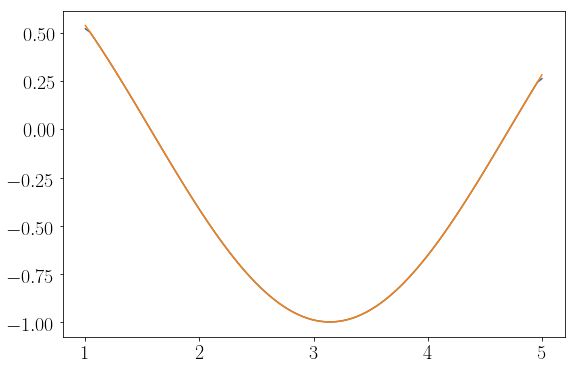

In [11]:
atab = np.linspace(1,5, 100)
btab = np.linspace(0,1, 200)
amesh, bmesh = np.meshgrid(atab, btab)

sinmesh = np.sin(amesh+bmesh)


costest = np.gradient(sinmesh, atab, axis = 1)

cosmesh = np.cos(amesh+bmesh)


fig = P.figure(); ax= fig.add_subplot(111);
ax.plot(atab, costest[0,:])
ax.plot(atab, cosmesh[0,:])
# print (costest - cosmesh)/cosmesh

print amesh.shape

In [12]:
# magtab = np.linspace(24,27,50)
mag = 25

z = 3.5

# mag_lim_red = np.array([app2abs(mm, z, "red") for mm in magtab])
# mag_lim_blue = np.array([app2abs(mm, z, "blue") for mm in magtab])
mag_lim_red = app2abs(mag, z, "red") 
mag_lim_blue = app2abs(mag, z, "blue")
# print maglimr - maglimb
# print "THIS IS WEIRD!"

norm=-0.4*np.log(10.)
lnlum_max=-35.*norm
# lnlum_max=-35.*norm*20
clred = quad(lumfun,norm*mag_lim_red,lnlum_max,args=(z,"red"))[0]#amadeus' edit
clblue =  quad(lumfun,norm*mag_lim_blue,lnlum_max,args=(z,"blue"))[0] #amadeus' edit

print lnlum_max, norm*mag_lim_blue

print -35, mag_lim_blue

32.23619130191665 25.634526835616974
-35 -27.832333877273193


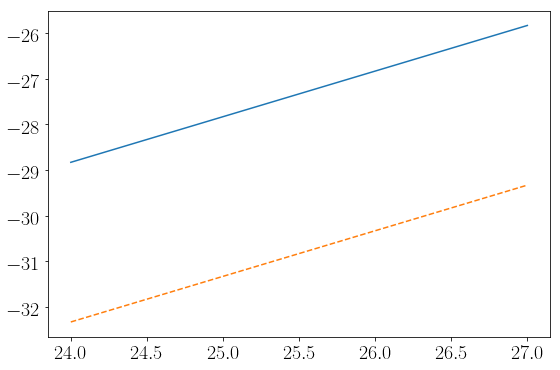

In [13]:
magtab = np.linspace(24,27,50)
blue_absmagtab = np.array([app2abs(mm, z, "blue") for mm in magtab])
red_absmagtab = np.array([ app2abs(mm, z, "red") for mm in magtab])

fig = P.figure(); ax = fig.add_subplot(111);
ax.plot(magtab, blue_absmagtab)
ax.plot(magtab, red_absmagtab, ls = "--")

In [14]:
bluetab = np.linspace(norm*mag_lim_blue, lnlum_max, 1000)
redtab = np.linspace(norm*mag_lim_red, lnlum_max, 1000)

lfbtab = np.array([ lumfun( bb, z, "blue") for bb in bluetab])
lfrtab = np.array([ lumfun (rr, z, "red") for rr in redtab])



absbluetab = np.linspace(-35, mag_lim_blue, 1000)[::-1]
absredtab = np.linspace(-35, mag_lim_red, 1000)[::-1]

lfbtab2 = np.array([ lumfun_mag( bb, z, "blue") for bb in absbluetab])
lfrtab2 = np.array([ lumfun_mag(rr, z, "red") for rr in absredtab])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

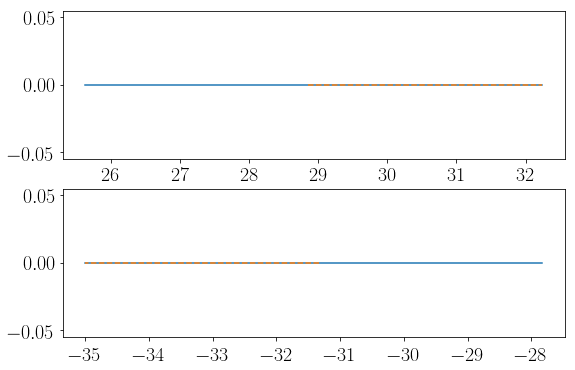

In [15]:
fig = P.figure(); ax = fig.add_subplot(211); ax2 = fig.add_subplot(212);
ax.plot(bluetab, lfbtab)
ax.plot(redtab, lfrtab, ls = "--")

ax2.plot(absbluetab, lfbtab2)
ax2.plot(absredtab, lfrtab2, ls = "--")

print lfbtab2

In [16]:
print lfbtab

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.